### 1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)

En esta primera fase del análisis se ha aplicado una función EDA (Exploratory Data Analysis) sobre los archivos “Customer Flight Activity.csv” y “Customer Loyalty History.csv”, con el objetivo de obtener una visión general de la estructura, distribución y calidad de los datos.

El propósito de este análisis exploratorio es evaluar la integridad y consistencia del conjunto de datos, identificando la presencia de valores nulos, duplicados o atípicos, así como analizar la distribución de las variables numéricas y categóricas. Este diagnóstico preliminar resulta esencial para definir posteriormente las estrategias de limpieza, imputación y transformación de los datos, garantizando la validez de los análisis estadísticos y visualizaciones posteriores.

En esta etapa se han utilizado principalmente gráficos de tipo histograma, boxplot y gráficos de barras, ya que se consideran los más adecuados para un EDA inicial, por los siguientes motivos:

- Histogramas: permiten visualizar la distribución de las variables numéricas, detectar sesgos, asimetrías o concentraciones inusuales de datos, así como identificar posibles outliers de forma visual.

- Boxplots: facilitan la detección clara y directa de valores atípicos, además de ofrecer información sobre la mediana, dispersión y simetría de las variables.

- Gráficos de barras: resultan especialmente útiles para analizar la frecuencia de las categorías en variables cualitativas, ayudando a detectar posibles desequilibrios, errores de codificación o categorías con baja representatividad.

Cabe destacar que los gráficos presentados en esta fase corresponden a datos aún sin procesos de limpieza, normalización o gestión de nulos. Por tanto, estas visualizaciones reflejan la naturaleza en bruto del dataset y constituyen un instrumento fundamental para detectar problemas estructurales o de calidad, así como para fundamentar las decisiones de tratamiento y depuración que se aplicarán posteriormente.

Finalmente, en algunos casos, ciertos gráficos pueden parecer inconsistentes ,por ejemplo, cuando se representan variables numéricas como categóricas o viceversa. Sin embargo, esta aproximación se ha realizado de forma deliberada con el objetivo de obtener una visión exhaustiva y contrastada de cada variable, permitiendo determinar con mayor precisión las estrategias de corrección y tratamiento más adecuadas para el análisis estadístico posterior. En dichos casos, se ha incluido una breve descripción indicando qué tipo de visualización sería más apropiada para cada variable.

En primer lugar se procede a importar las librerías necesarias:

In [69]:
import pandas as pd          # Manejo y análisis de datos en tablas (DataFrames)
import numpy as np           # Cálculos numéricos y manejo de arreglos
from IPython.display import display  # Muestra objetos de forma clara en notebooks
import matplotlib.pyplot as plt      # Crear gráficos y visualizaciones
import seaborn as sns        # Gráficos estadísticos atractivos (basado en matplotlib)
from scipy import stats      # Funciones y pruebas estadísticas
from matplotlib.lines import Line2D  # Crear o personalizar líneas en gráficos

1. Cargamos los archivos csv

In [70]:
# ver todas las columnas
pd.set_option('display.max_columns', None)

In [71]:
# ver todas las filas
pd.set_option('display.max_rows', None)

In [72]:
df_customer_flight = pd.read_csv("Customer Flight Activity.csv")

In [73]:
df_customer_loyalty = pd.read_csv("Customer Loyalty History.csv")

Hacemos una primera visualización de los datos:

In [74]:
df_customer_flight.head()


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [75]:
df_customer_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


La función EDA también tiene visualizaciones, por tanto, antes de proceder a las mismas, cabe hacer ciertas matizaciones:

La variable  **Loyalty Number**  representa un identificador único para cada cliente dentro del programa de lealtad de la aerolínea. Cada número de lealtad corresponde a un cliente específico.

No tiene un significado numérico o analítico directo, con lo cual no tiene sentido hacer un histograma con esta variable. El único propósito de esta variable es servir de identificador.

Obviando esta variable para que no salga en las gráficas, el resto de variables las vamos a mantener y vamos a analizar si es coherente el tipo de gráfico con la naturaleza de dicha variable.


Función EDA:

In [ ]:
def eda(df):
    """
    Exploratory Data Analysis (EDA) profesional de un DataFrame.

    Incluye:
    - Vista general (dimensiones, tipos, primeras/últimas filas)
    - Estadísticas descriptivas (numéricas y categóricas)
    - Valores nulos, duplicados y únicos
    - Detección de outliers (numéricos)
    - Gráficos (mostrados al final)
    """

    
    # CONFIGURACIÓN GLOBAL DE ESTILO PARA LOS GRÁFICOS
    
    # Se ajustan parámetros visuales para mantener coherencia estética en todas las visualizaciones
    sns.set_theme(style="whitegrid", context="talk")  # Fondo blanco con rejilla y tamaño de fuente amplio
    plt.rcParams.update({
        "figure.figsize": (10, 5),         # Tamaño estándar de las figuras
        "axes.titlesize": 16,              # Tamaño de fuente del título de los gráficos
        "axes.labelsize": 13,              # Tamaño de fuente de las etiquetas de ejes
        "axes.edgecolor": "#333333",       # Color de los bordes de los ejes
        "axes.linewidth": 0.8,             # Grosor de los bordes de los ejes
        "xtick.labelsize": 11,             # Tamaño de las etiquetas del eje X
        "ytick.labelsize": 11,             # Tamaño de las etiquetas del eje Y
        "font.family": "sans-serif",       # Tipo de fuente general
        "font.sans-serif": ["DejaVu Sans"] # Fuente usada para el texto
    })

    # Colores para los distintos tipos de visualización
    color_hist = "#4B8BBE"  # Azul para histogramas
    color_box = "#E07A5F"   # Naranja para boxplots

    
    # COMPROBACIONES INICIALES DEL DATASET
    
    # Información básica: número de filas y columnas
    print(f"Dimensiones del dataset: {df.shape[0]:,} filas × {df.shape[1]:,} columnas\n")

    # Muestra las 5 primeras filas
    print(" Primeras 5 filas del dataset:")
    display(df.head())

    # Muestra las 5 últimas filas
    print("\n Últimas 5 filas del dataset:")
    display(df.tail())

    # Información general del DataFrame (tipos, nulos, memoria usada)
    print("\nInformación general:")
    df.info()

    # Tipos de datos de cada columna
    print("\nTipos de datos por columna:")
    display(df.dtypes.to_frame("Tipo de dato"))

    
    # SEPARACIÓN DE VARIABLES SEGÚN SU TIPO
    
    # Se identifican las columnas numéricas y categóricas
    num_cols = df.select_dtypes(include="number").columns.tolist()
    cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

    print(f"\nColumnas numéricas: {len(num_cols)}")
    print(f"Columnas categóricas: {len(cat_cols)}")

    
    # ESTADÍSTICAS DESCRIPTIVAS Y DETECCIÓN DE OUTLIERS
    
    if num_cols:
        print("\nEstadísticas descriptivas (numéricas):")
        # Se muestran estadísticas extendidas (con percentiles adicionales)
        display(df[num_cols].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T)

        # Cálculo de valores atípicos mediante el rango intercuartílico (IQR)
        Q1 = df[num_cols].quantile(0.25)
        Q3 = df[num_cols].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()

        # Solo se muestran columnas donde existan outliers
        outliers = outliers[outliers > 0]
        if not outliers.empty:
            print("\nPosibles outliers detectados:")
            display(outliers.to_frame("Filas con outliers"))
        else:
            print("\nNo se detectaron outliers significativos.")

    
    # ESTADÍSTICAS DESCRIPTIVAS PARA VARIABLES CATEGÓRICAS
    
    if cat_cols:
        print("\nEstadísticas descriptivas (categóricas):")
        # Muestra conteos, frecuencia de categoría más común y número de categorías
        display(df[cat_cols].describe().T)
    else:
        print("\nNo hay columnas categóricas.")

    
    # COMPROBACIÓN DE VALORES NULOS Y DUPLICADOS
    
    print("\nValores nulos por columna:")
    # Se calcula el número y porcentaje de valores nulos por columna
    nulos_df = pd.DataFrame({
        "Nulos": df.isnull().sum(),
        "% Nulos": (df.isnull().mean() * 100).round(2)
    }).sort_values("% Nulos", ascending=False)

    # Si no hay nulos, se muestra un mensaje
    if nulos_df["Nulos"].sum() == 0:
        print("No se encontraron valores nulos en el dataset.")
    else:
        display(nulos_df[nulos_df["Nulos"] > 0])

    # Cálculo del número de filas duplicadas
    dup_count = df.duplicated().sum()
    if dup_count == 0:
        print("\nNo se encontraron filas duplicadas en el dataset.")
    else:
        print(f"\nFilas duplicadas: {dup_count:,}")

    
    # RESUMEN GENERAL DEL DATASET
    
    # Se genera un resumen general con tipo de dato, valores únicos y porcentaje de nulos
    resumen = pd.DataFrame({
        "Columna": df.columns,
        "Tipo": df.dtypes.astype(str),
        "Valores únicos": df.nunique().values,
        "% Nulos": (df.isnull().mean() * 100).round(2).values
    })
    print("\nResumen general de columnas:")
    display(resumen)

    
    # VISUALIZACIONES GRÁFICAS 
    
    print("\nVisualizaciones")

    
    # VISUALIZACIÓN DE VARIABLES NUMÉRICAS
    
    print("\nGráfico variables numéricas")
    # Se excluye 'Loyalty Number' solo en los gráficos (no del análisis)
    plot_num_cols = [col for col in num_cols if col != "Loyalty Number"]

    for col in plot_num_cols:
        data = df[col].dropna()  # Se eliminan valores nulos
        if data.empty:
            continue  # Se omite si no hay datos válidos

        # Se crean dos subgráficos: uno para histograma y otro para boxplot
        fig, axes = plt.subplots(1, 2, figsize=(13, 5), gridspec_kw={'width_ratios': [2, 1]})
        fig.suptitle(f"Distribución y boxplot de {col}", fontsize=15, fontweight="bold", y=1.03)

        # Histograma con densidad (KDE)
        sns.histplot(data, kde=True, bins=30, color=color_hist, ax=axes[0])

        # Cálculo de medidas de tendencia central
        mean_val = data.mean()
        median_val = data.median()
        mode_val = data.mode()[0] if not data.mode().empty else None

        # Líneas verticales para media, mediana y moda
        axes[0].axvline(mean_val, color="red", linestyle="--", linewidth=1.3, label=f"Media ({mean_val:.2f})")
        axes[0].axvline(median_val, color="green", linestyle="--", linewidth=1.3, label=f"Mediana ({median_val:.2f})")
        if mode_val is not None:
            axes[0].axvline(mode_val, color="orange", linestyle="--", linewidth=1.3, label=f"Moda ({mode_val:.2f})")

        # Leyenda (cuadro informativo) más pequeña y más transparente
        axes[0].legend(
            fontsize=7,                # Fuente más pequeña
            loc="lower right",         # Posición en la esquina inferior derecha
            frameon=True,              # Cuadro visible
            facecolor="white",         # Fondo blanco
            edgecolor="gray",          # Borde gris
            framealpha=0.6             # Transparencia aumentada (más sutil)
        )

        # Ejes X e Y con etiquetas en negrita
        axes[0].set_xlabel(col, fontsize=12, fontweight="bold")
        axes[0].set_ylabel("Frecuencia", fontsize=12, fontweight="bold")

        # Boxplot complementario
        sns.boxplot(y=data, color=color_box, ax=axes[1])
        axes[1].set_ylabel("")  # Sin etiqueta en Y
        axes[1].set_xlabel("")  # Sin etiqueta en X

        # Ajuste automático de espaciado
        plt.tight_layout()
        plt.show()

    
    # VISUALIZACIÓN DE VARIABLES CATEGÓRICAS
    
    print("\nGráfico variables categóricas")
    if not cat_cols:
        # Si no existen columnas categóricas
        print("No hay variables categóricas en los datos en bruto.")
    else:
        for col in cat_cols:
            plt.figure(figsize=(10, 5))  # Tamaño del gráfico de barras
            order = df[col].value_counts().index[:20]  # Orden de las 20 categorías más frecuentes

            # Gráfico de barras (countplot)
            sns.countplot(
                x=col,
                hue=col,                  # Cada categoría recibe un color distinto
                data=df,
                order=order,              # Ordenar por frecuencia
                palette="crest",          # Paleta de colores suaves
                legend=False,             # Se elimina leyenda redundante
                edgecolor="gray",         # Borde gris
                linewidth=0.6             # Grosor del borde
            )

            # Título y etiquetas con formato profesional
            plt.title(f"Distribución de {col}", fontsize=14, fontweight="bold", pad=15)
            plt.xlabel(col, fontsize=12, fontweight="bold")
            plt.ylabel("Frecuencia", fontsize=12, fontweight="bold")
            plt.xticks(rotation=25, ha="right")  # Rotación de etiquetas para evitar solapamiento
            plt.tight_layout()
            plt.show()

    
    # RESULTADO FINAL
    
    # Se devuelve el resumen general del dataset como resultado
    return resumen



Resultados obtenidos para df_customer_flight:

EDA para df_customer_flight
Dimensiones del dataset: 405,624 filas × 10 columnas

 Primeras 5 filas del dataset:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0



 Últimas 5 filas del dataset:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB

Tipos de datos por columna:


,Tipo de dato
Loyalty Number,int64
Year,int64
Month,int64
Flights Booked,int64
Flights with Companions,int64
Total Flights,int64
Distance,int64
Points Accumulated,float64
Points Redeemed,int64
Dollar Cost Points Redeemed,int64



Columnas numéricas: 10
Columnas categóricas: 0

Estadísticas descriptivas (numéricas):


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,108481.0,144879.0,326961.00,550834.0,772194.00,954750.0,990598.0,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.0,2017.0,2017.00,2017.5,2018.00,2018.0,2018.0,2018.0
Month,405624.0,6.500000,3.452057,1.0,1.0,1.0,3.75,6.5,9.25,12.0,12.0,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.0,0.0,0.00,1.0,8.00,15.0,18.0,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.0,0.0,0.00,0.0,1.00,6.0,9.0,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.0,0.0,0.00,1.0,10.00,18.0,24.0,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.0,0.0,0.00,488.0,2336.00,3920.0,4849.0,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.0,0.0,0.00,50.0,239.00,402.0,494.0,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.0,0.0,0.00,0.0,0.00,389.0,638.0,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.0,0.0,0.00,0.0,0.00,32.0,52.0,71.0



Posibles outliers detectados:


,Filas con outliers
Flights Booked,528
Flights with Companions,71560
Total Flights,1984
Distance,146
Points Accumulated,127
Points Redeemed,24181
Dollar Cost Points Redeemed,24181



No hay columnas categóricas.

Valores nulos por columna:
No se encontraron valores nulos en el dataset.

Filas duplicadas: 1,864

Resumen general de columnas:


,Columna,Tipo,Valores únicos,% Nulos
Loyalty Number,Loyalty Number,int64,16737,0.0
Year,Year,int64,2,0.0
Month,Month,int64,12,0.0
Flights Booked,Flights Booked,int64,22,0.0
Flights with Companions,Flights with Companions,int64,12,0.0
Total Flights,Total Flights,int64,33,0.0
Distance,Distance,int64,4746,0.0
Points Accumulated,Points Accumulated,float64,1549,0.0
Points Redeemed,Points Redeemed,int64,587,0.0
Dollar Cost Points Redeemed,Dollar Cost Points Redeemed,int64,49,0.0



Visualizaciones

Gráfico variables numéricas


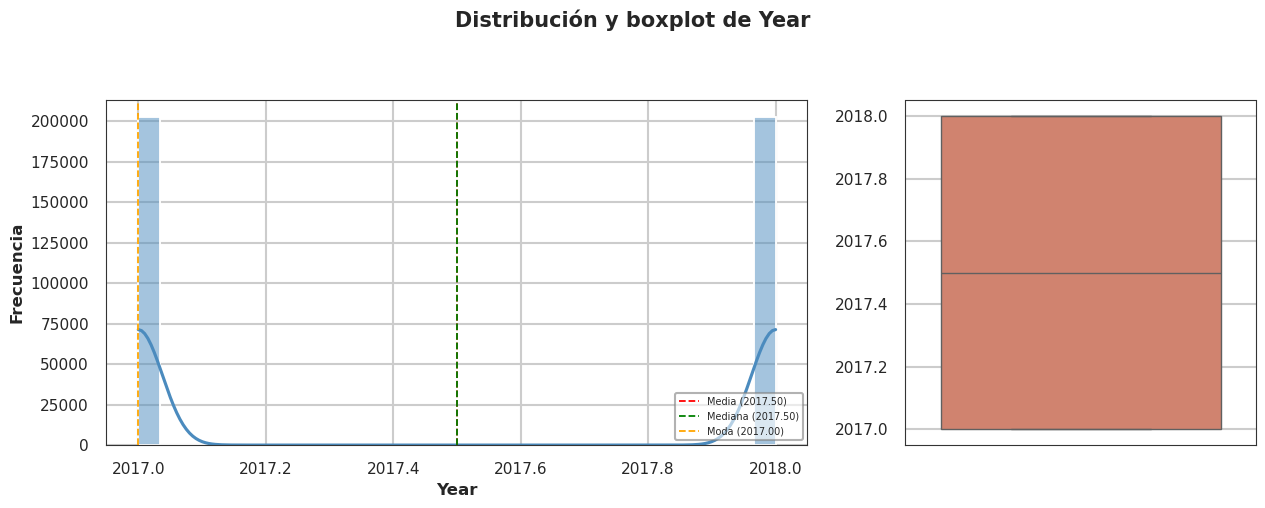

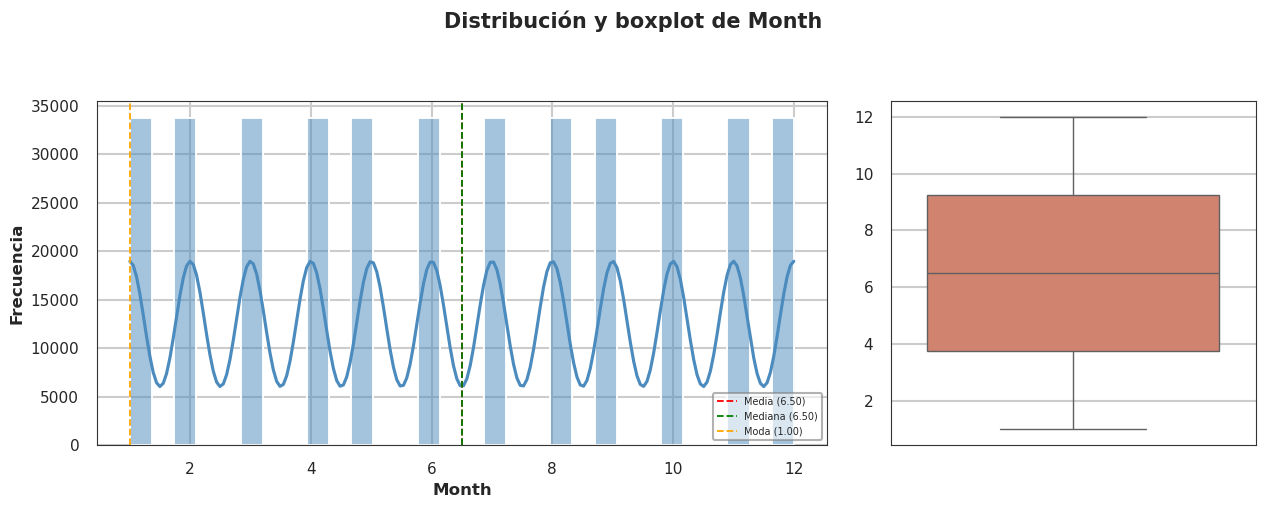

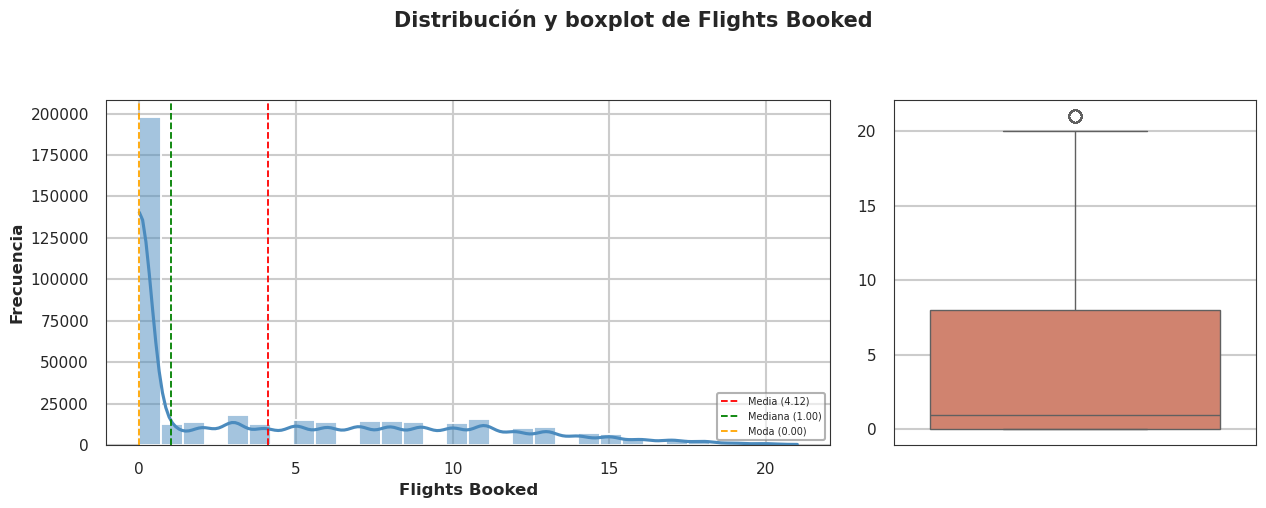

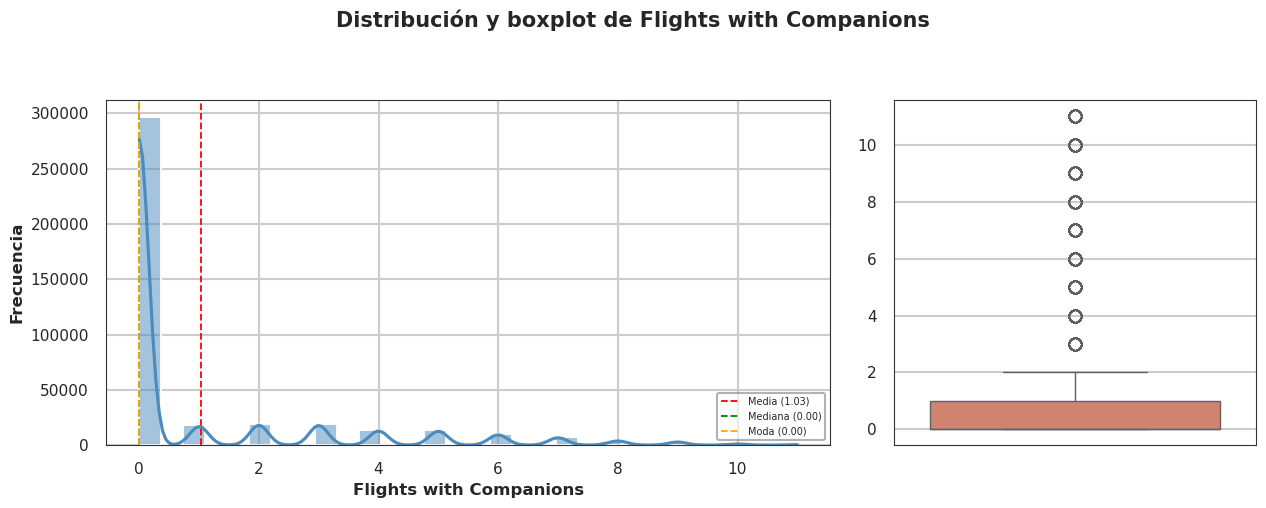

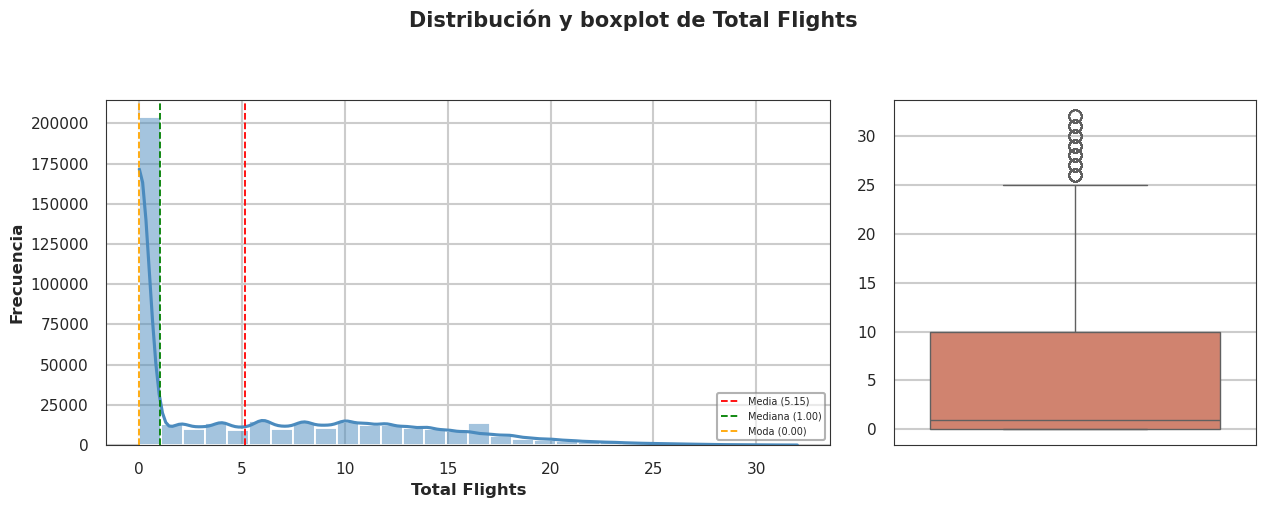

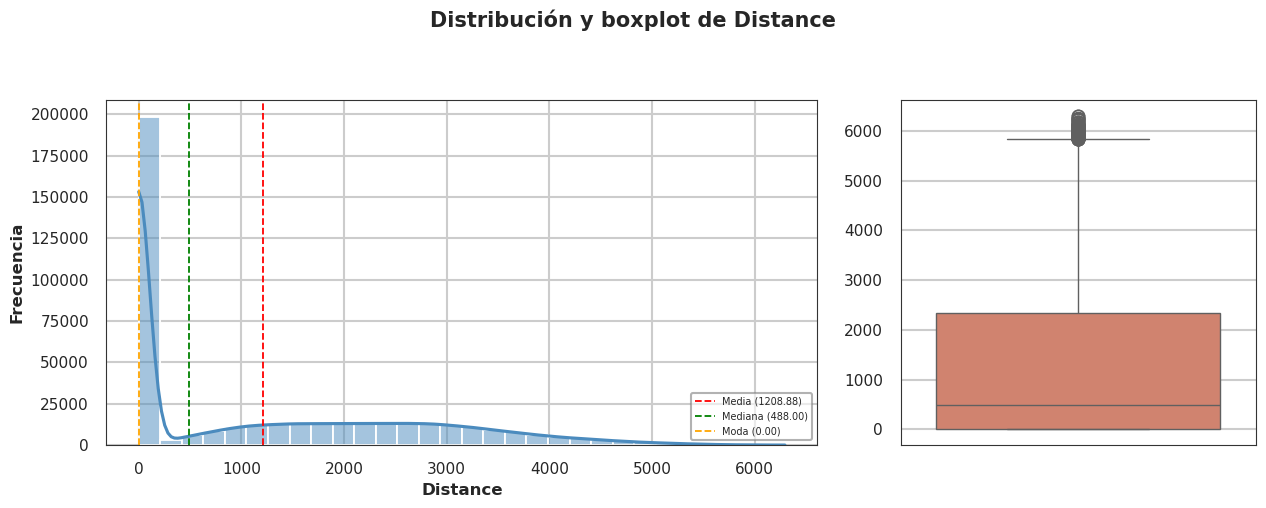

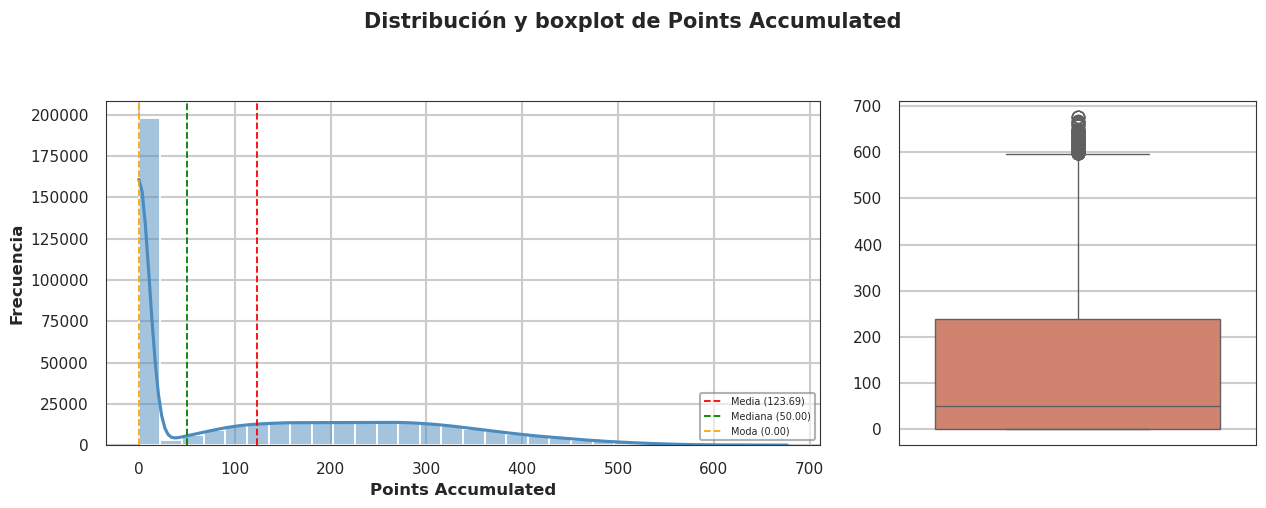

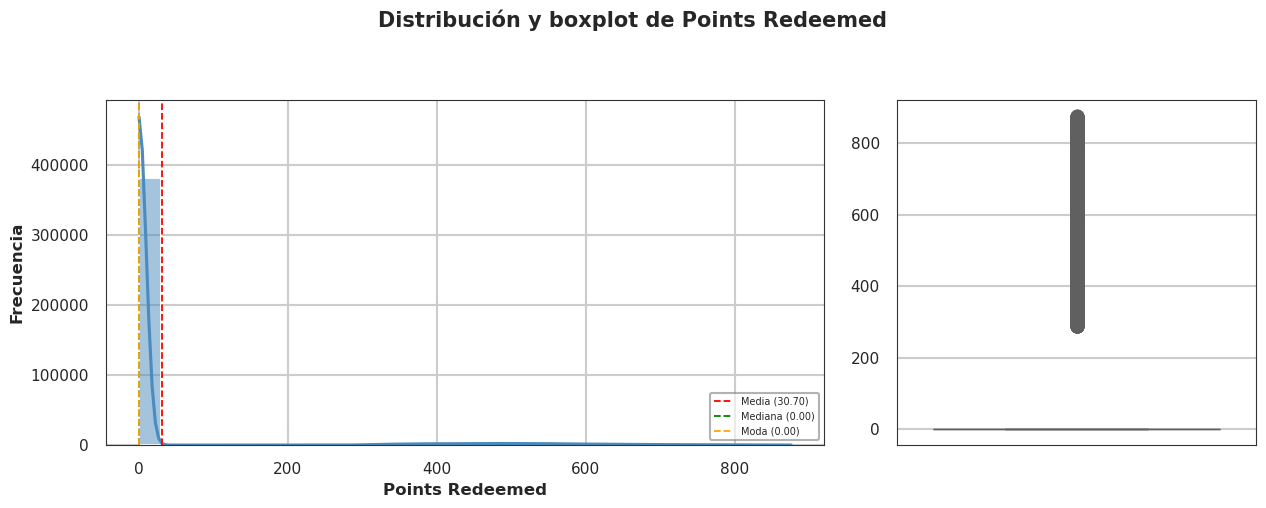

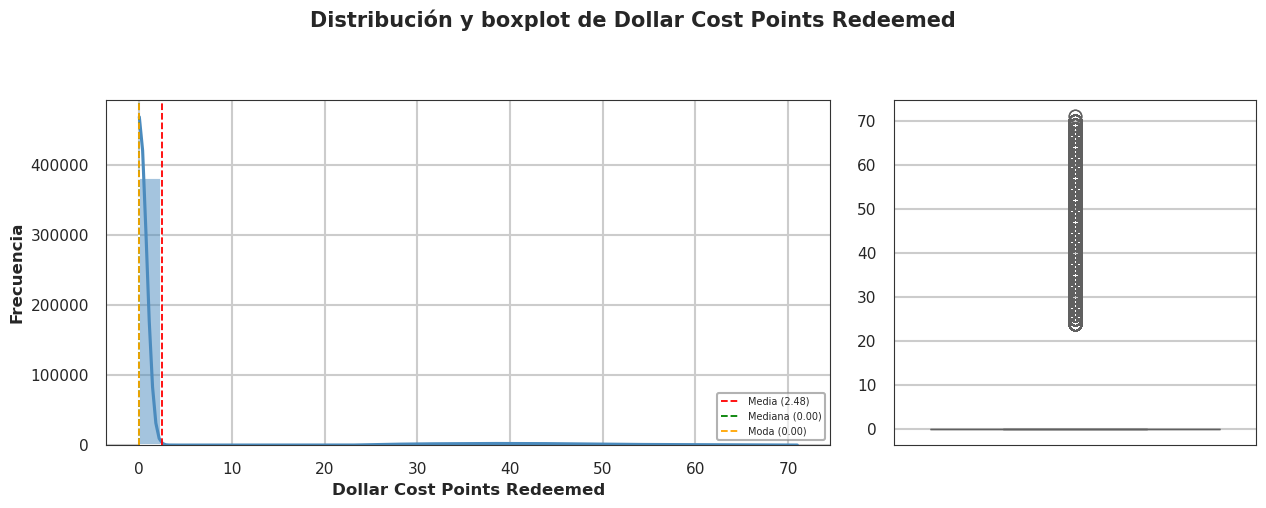


Gráfico variables categóricas
No hay variables categóricas en los datos en bruto.


In [78]:
# EDA para df_customer_flight
print("EDA para df_customer_flight")
resumen_flight = eda(df_customer_flight)

EDA para df_customer_loyalty
Dimensiones del dataset: 16,737 filas × 16 columnas

 Primeras 5 filas del dataset:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN



 Últimas 5 filas del dataset:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-nu

,Tipo de dato
Loyalty Number,int64
Country,object
Province,object
City,object
Postal Code,object
Gender,object
Education,object
Salary,float64
Marital Status,object
Loyalty Card,object



Columnas numéricas: 7
Columnas categóricas: 9

Estadísticas descriptivas (numéricas):


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,108562.9200,144924.600,326603.00,550434.00,772019.00,954474.800,990681.2000,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,40260.0000,48443.600,59246.50,73455.00,88517.50,123841.000,250253.0000,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,2230.4528,2475.514,3980.84,5780.18,8940.58,22031.692,35928.6432,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2012.0000,2012.000,2014.00,2015.00,2017.00,2018.000,2018.0000,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,1.0000,1.000,4.00,7.00,10.00,12.000,12.0000,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2013.0000,2014.000,2016.00,2017.00,2018.00,2018.000,2018.0000,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,1.0000,1.000,4.00,7.00,10.00,12.000,12.0000,12.00



Posibles outliers detectados:


,Filas con outliers
Salary,549
CLV,1485



Estadísticas descriptivas (categóricas):


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766



Valores nulos por columna:


,Nulos,% Nulos
Cancellation Month,14670,87.65
Cancellation Year,14670,87.65
Salary,4238,25.32



No se encontraron filas duplicadas en el dataset.

Resumen general de columnas:


,Columna,Tipo,Valores únicos,% Nulos
Loyalty Number,Loyalty Number,int64,16737,0.00
Country,Country,object,1,0.00
Province,Province,object,11,0.00
City,City,object,29,0.00
Postal Code,Postal Code,object,55,0.00
Gender,Gender,object,2,0.00
Education,Education,object,5,0.00
Salary,Salary,float64,5890,25.32
Marital Status,Marital Status,object,3,0.00
Loyalty Card,Loyalty Card,object,3,0.00



Visualizaciones

Gráfico variables numéricas


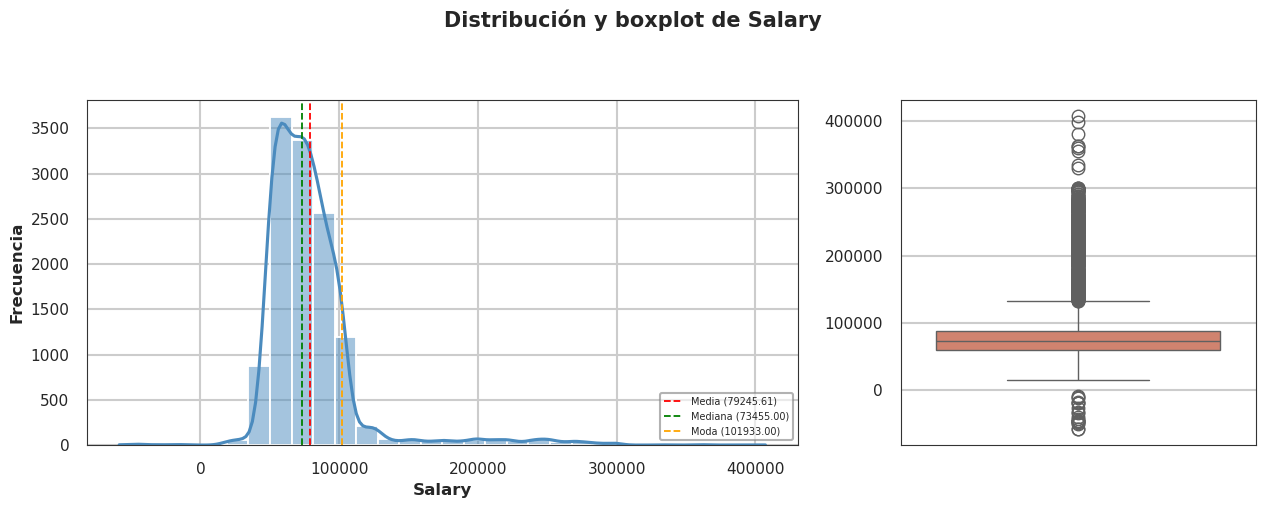

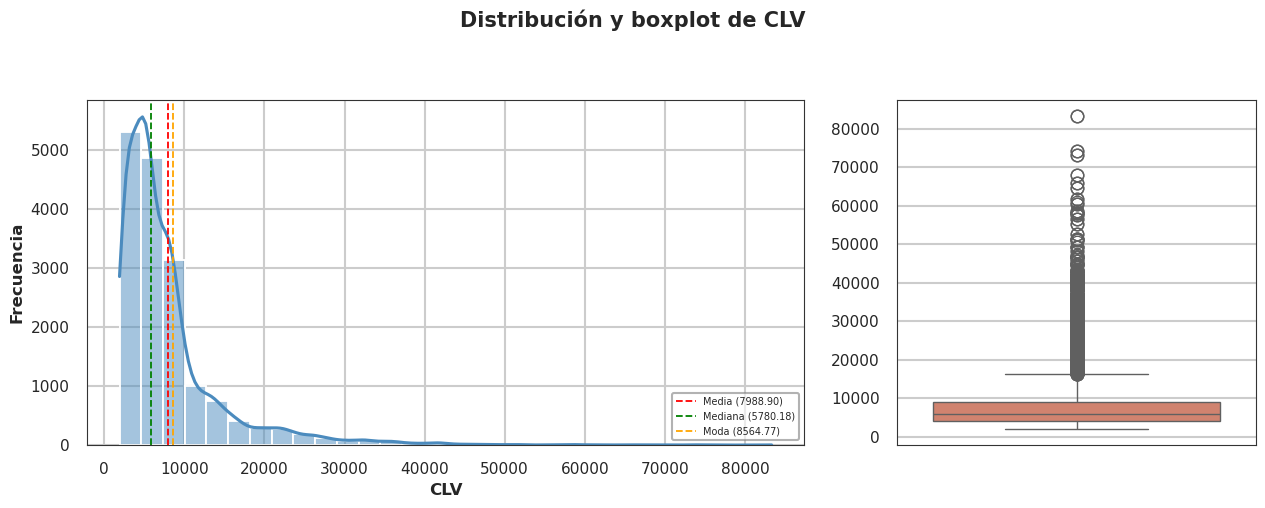

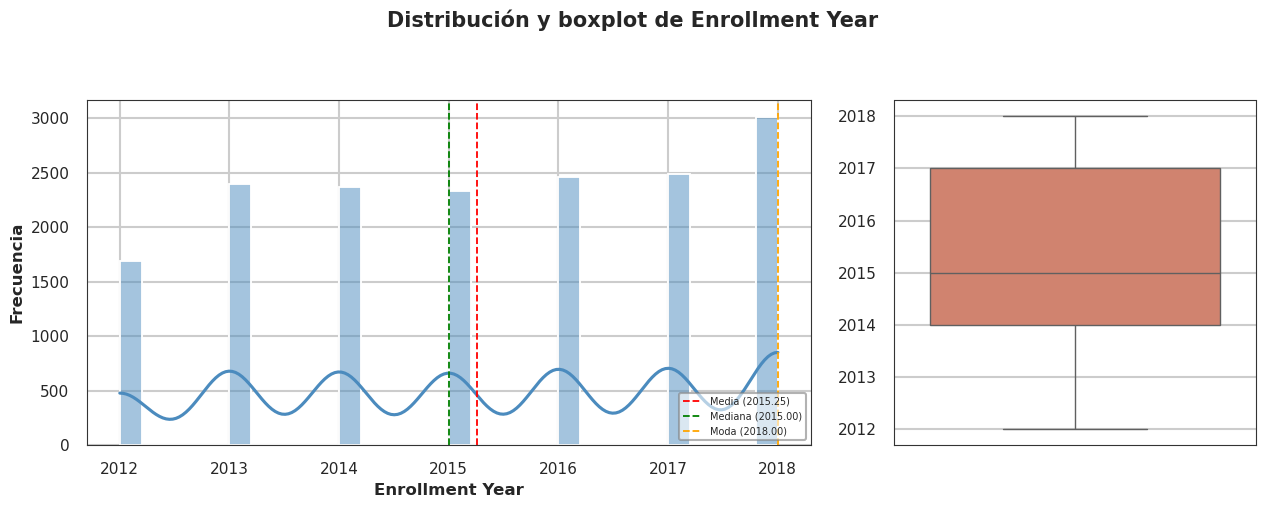

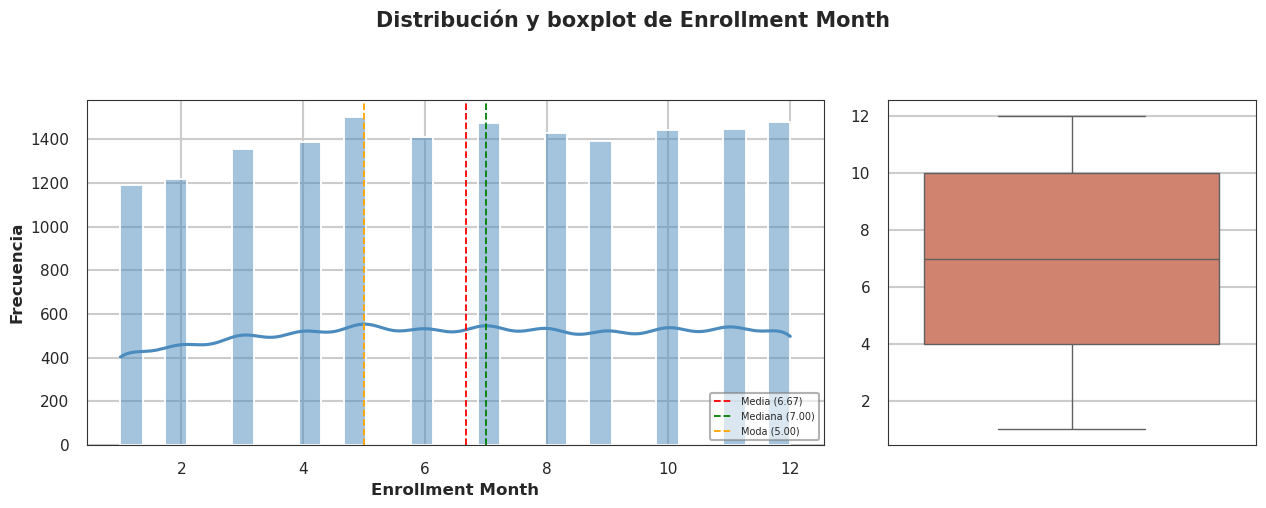

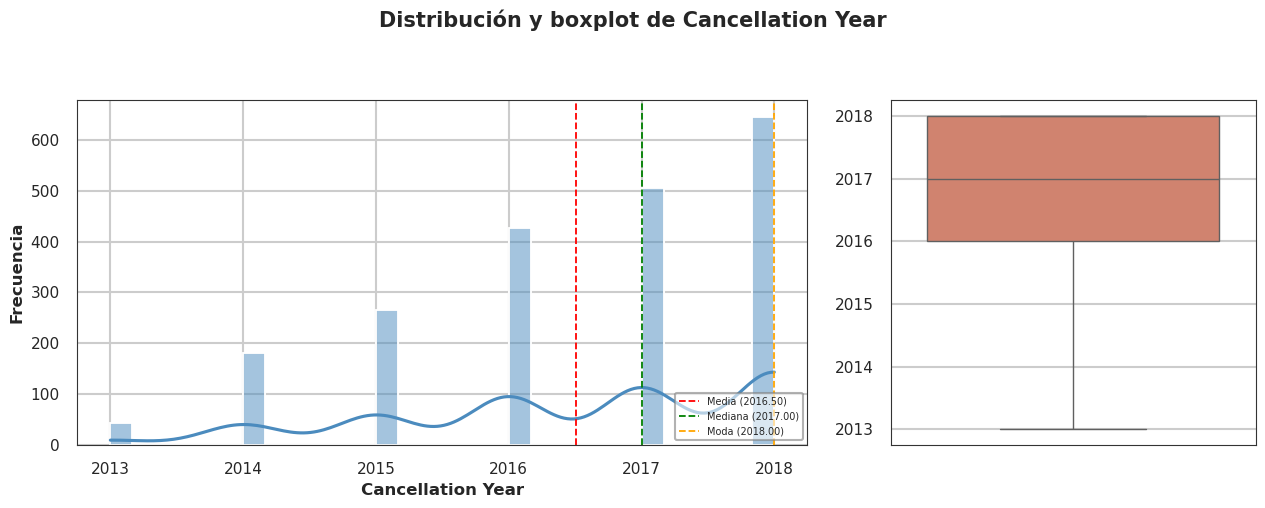

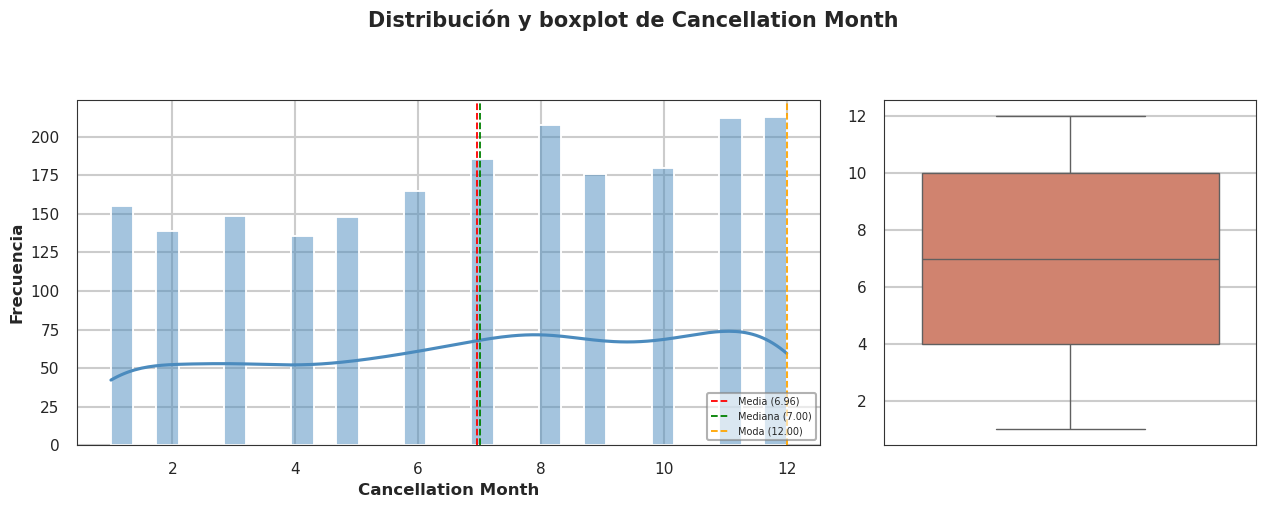


Gráfico variables categóricas


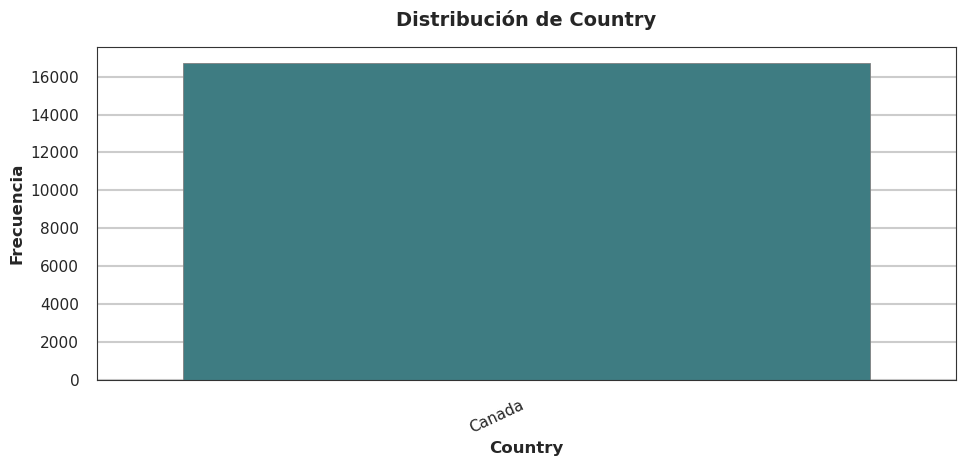

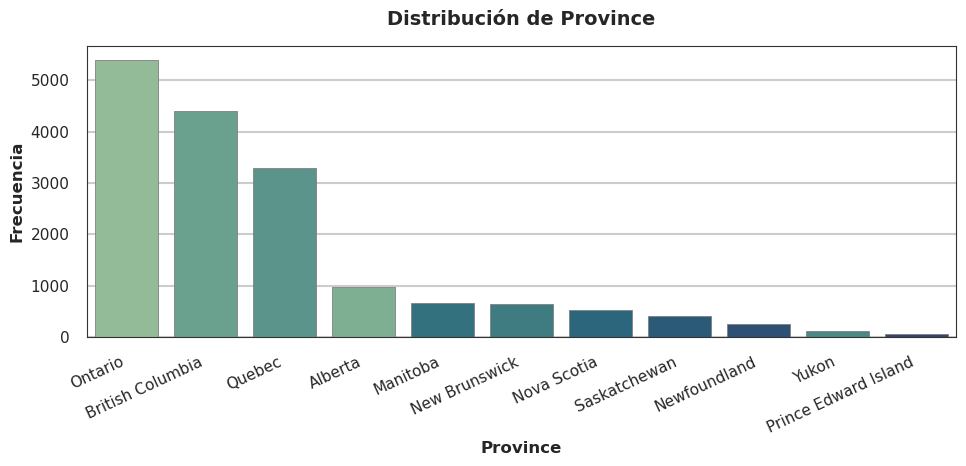

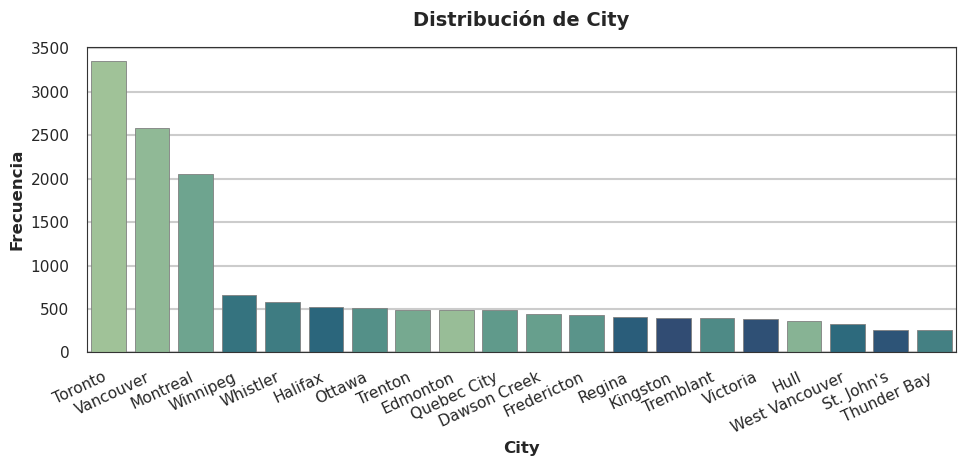

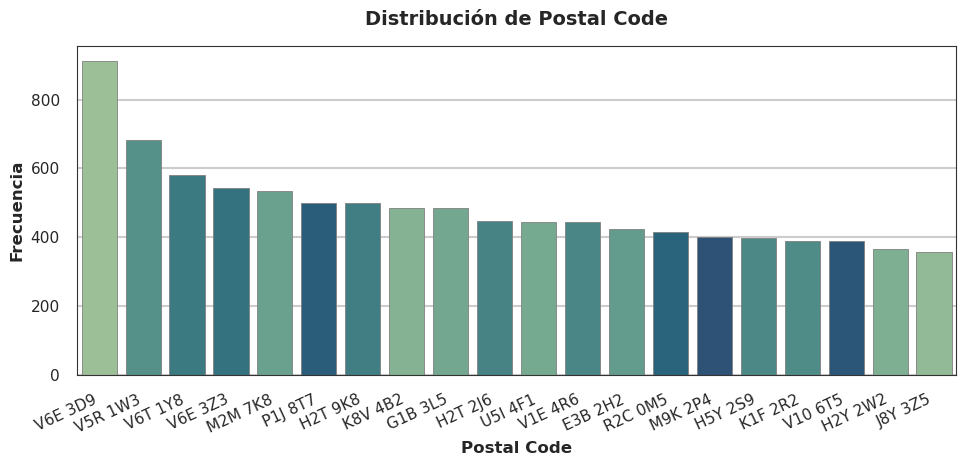

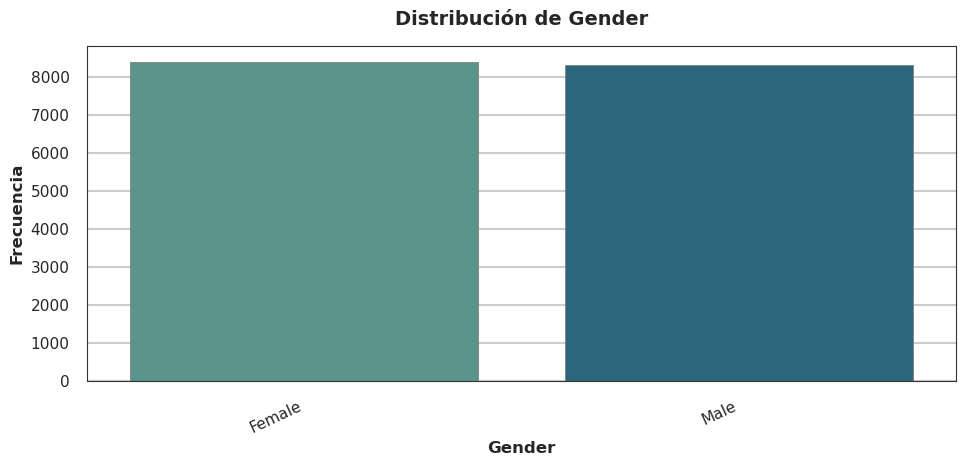

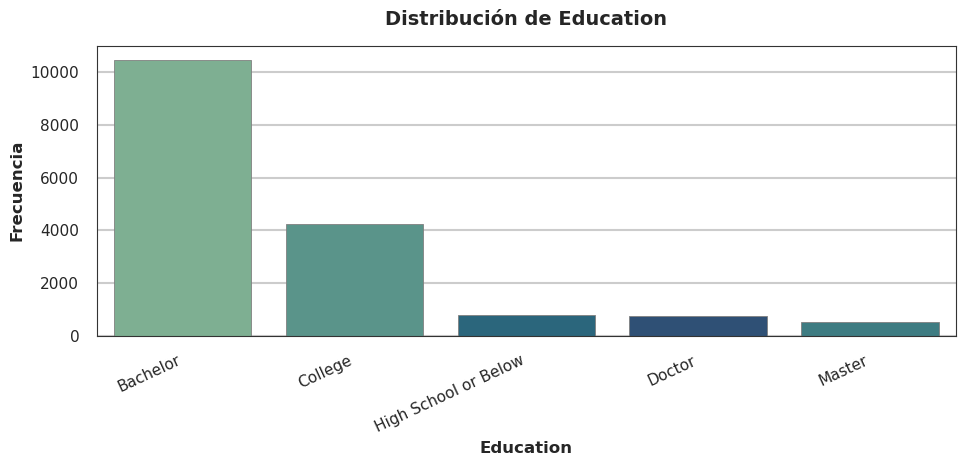

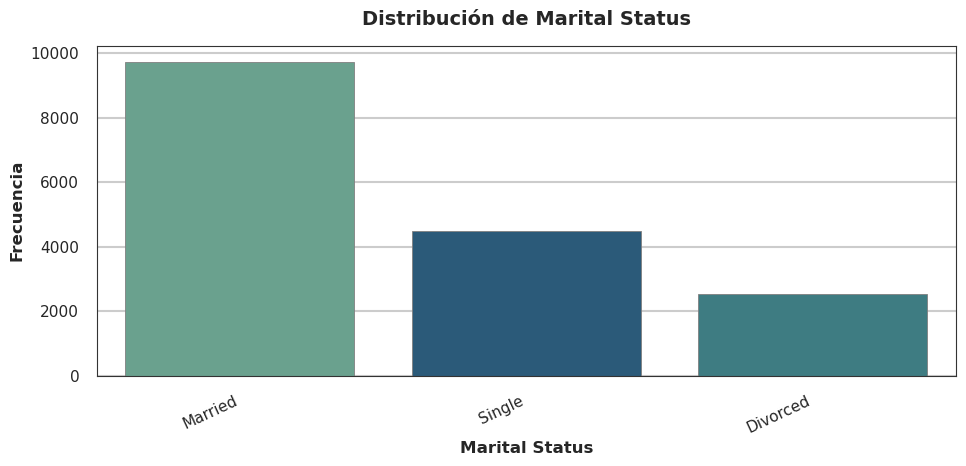

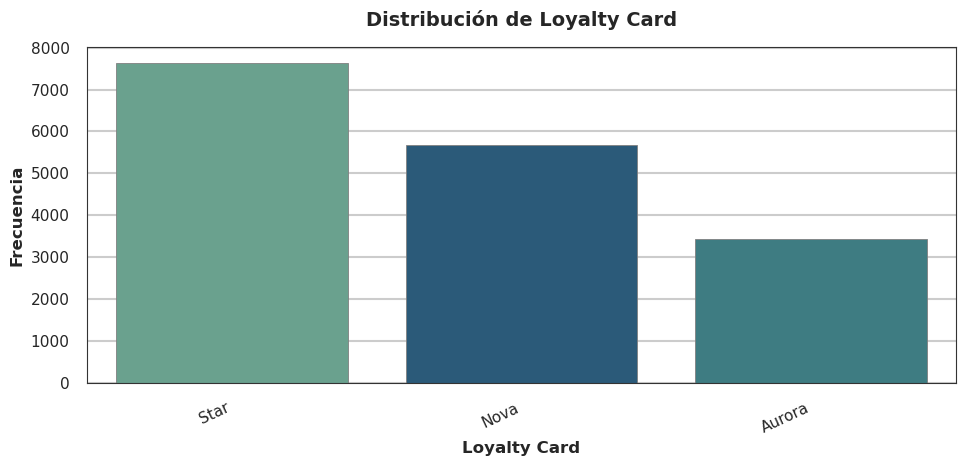

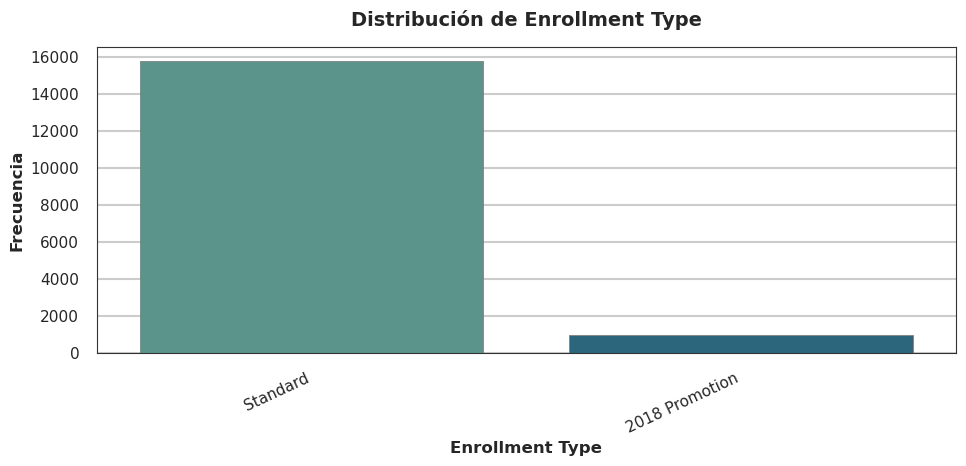

In [79]:
# EDA para df_customer_loyalty
print("EDA para df_customer_loyalty")
resumen_flight = eda(df_customer_loyalty)

#### ANÁLISIS DE LAS GRÁFICAS DE LAS VARIABLES NUMÉRICAS

### Variable Year

Indica el año en el cual se registraron las actividades de vuelo para el cliente.

No tiene valores nulos.  

La representación mediante histograma y boxplot no es apropiada para la variable Year, ya que ambos gráficos se utilizan para variables numéricas continuas.

Sin embargo, Year es una variable discreta y categórica, porque solo puede tomar valores enteros (años concretos, como 2017 o 2018), sin valores intermedios.

El eje X muestra valores decimales irreales (2017.2, 2017.6, etc.), que no tienen ningún sentido temporal ni analítico. Tampoco tiene sentido una media de 2017.5.


**Conclusión analítica**

La variable Year no debe analizarse como numérica, ya que:

-  mide una magnitud continua ni admite operaciones aritméticas (no tiene sentido calcular medias, desviaciones, etc.).

-  Su propósito es distinguir periodos de observación (año de registro).

- **Su representación correcta debería ser categórica y analizarla mediante gráficos de barras o tablas de frecuencia.**


### Variable Month

Representa el mes del año (de 1 a 12) en el cual ocurrieron las actividades de vuelo.

No presenta valores atípicos ni valores nulos. 


**Interpretación del histograma y el boxplot**

En el eje X se representan los meses del año (1 = enero, 12 = diciembre) y en el eje Y la frecuencia de registros correspondientes a cada mes.

Las barras presentan una altura casi uniforme, lo que indica una distribución equilibrada a lo largo del año. Esto sugiere que no existe una estacionalidad marcada ni una concentración de observaciones en un mes concreto. Las medidas de tendencia central  son cercanas, reflejando una distribución simétrica.

El boxplot confirma esta interpretación: la caja se extiende del mes 4 al 10 (abril a octubre), y los bigotes alcanzan los extremos (1 y 12), lo que indica ausencia de outliers y presencia de registros en todos los meses.

**Conclusión analítica**

- Month es una variable categórica ordinal, ya que representa periodos discretos y ordenados (meses del año). Presenta una distribución uniforme, sin sesgos ni vacíos. 

- Es útil para análisis de tendencias o patrones estacionales, pero no debe tratarse como variable numérica continua (no tiene sentido calcular medias o desviaciones estándar).

- **Su representación correcta debería ser categórica y representarse mediante gráfico de barras**.



### Variable Flights Booked

Número total de vuelos reservados por el cliente en ese mes específico.

Presenta un 0.13 % de valores atípicos u outliers.

No presenta valores nulos. 

**Interpretación del histograma y boxplot**

El eje X muestra la cantidad de vuelos reservados por cliente en el mes, mientras que el eje Y indica la frecuencia de clientes que realizaron ese número de reservas.

La gran mayoría de los clientes reserva muy pocos vuelos por mes, reflejándose en la barra más alta cerca de 0.

A medida que aumenta el número de vuelos reservados, la frecuencia disminuye rápidamente, observándose algunos casos poco comunes con más de 10 o 15 vuelos al mes.

Las medidas de tendencia central refuerzan esta observación:

La media, aproximadamente 4 vuelos,  es superior a la mediana, 1 vuelo, y la moda que sería 0 vuelos, confirma que la mayoría de clientes apenas realizan reservas. 


Esta diferencia entre media y mediana evidencia una distribución fuertemente sesgada a la derecha, donde unos pocos clientes con muchas reservas elevan el promedio.

El boxplot muestra la concentración principal entre 0 y 5 vuelos, con algunos outliers (≈0.13%) que representan a clientes con una actividad de reservas inusualmente alta.


**Conclusión analítica**

La mayoría de los clientes realiza pocas reservas mensuales, mientras que un pequeño grupo concentra una gran cantidad de vuelos, probablemente viajeros frecuentes o clientes corporativos. Por lo tanto, estos outliers, se consideran válidos y representativos, por lo que no deberían eliminarse, ya que aportan información valiosa sobre un segmento específico de alto valor.

### Variable Flights with Companions

Número de vuelos reservados en los cuales el cliente viajó con acompañantes.

Presenta un 17.72% de valores atípicos u outliers.

No presenta valores nulos.

**Interpretación del histograma y boxplot**

El eje X representa la cantidad de vuelos realizados con acompañantes y el eje Y la frecuencia de clientes con cada valor. Se observa una concentración muy alta en el valor 0, indicando que la mayoría de los clientes viajan solos.

A medida que aumenta el número de vuelos con acompañantes, la frecuencia disminuye rápidamente, mostrando una distribución fuertemente sesgada a la derecha.

Las medidas de tendencia central refuerzan esta idea:

La media (1.04) indica que, en promedio, los clientes realizan alrededor de un vuelo con acompañantes.

La mediana (0) señala que la mitad de los clientes no viaja con acompañantes.

La moda (0) confirma que el valor más frecuente es 0 vuelos acompañados.


El boxplot muestra una gran concentración de datos entre 0 y 1 vuelos con acompañantes, con una mediana en 0.

Los puntos por encima de los bigotes representan los outliers, correspondientes a clientes que viajaron muchas veces con acompañantes (entre 3 y más de 10 vuelos).
La proporción de outliers es del 17.7%, una cantidad considerable que refleja casos reales de viajeros más sociales o familiares.



**Conclusiones analíticas**

La distribución es altamente asimétrica hacia la derecha, ya que la mayoría de los clientes viaja solos y solo un pequeño grupo lo hace acompañado. Por su parte, los outliers representan un segmento real de clientes (familias o grupos que viajan juntos frecuentemente).

No se opta por eliminar outliers, ya que reflejan comportamientos válidos.


### Variable Total Flights

El número total de vuelos que el cliente ha realizado.

Presenta un 0.49 % de valores atípicos u outliers.

No presenta valores nulos.

**Interpretación del histograma y boxplot**

El eje X muestra el número total de vuelos realizados por cliente, mientras que el eje Y representa la frecuencia de clientes con cada cantidad de vuelos.
Se observa una alta concentración en los valores bajos (0 y 1 vuelo), indicando que la mayoría de los clientes ha viajado muy pocas veces.
A medida que el número de vuelos aumenta, la frecuencia desciende rápidamente, lo que evidencia una distribución fuertemente sesgada hacia la derecha.

Las medidas de tendencia central confirman este patrón:

- Media = 5.17: el número promedio de vuelos por cliente es de 5, influido por algunos clientes con más vuelos.

- Mediana = 1: la mitad de los clientes tiene un solo vuelo o menos.

- Moda = 0: el valor más frecuente corresponde a clientes que no han volado o apenas registran su primer viaje.


El boxplot refuerza la concentración de datos en valores bajos, con la mediana en 1 y una caja estrecha que abarca aproximadamente de 0 a 10 vuelos.
Los puntos por encima de los bigotes representan outliers (0.49 % del total), correspondientes a clientes que acumulan de 25 vuelos en adelante.
Estos valores extremos, aunque poco frecuentes, elevan la media y alargan la cola derecha de la distribución.


**Conclusión analítica**

Su distribución es altamente asimétrica a la derecha, con la mayoría de los clientes realizando pocos vuelos y un grupo reducido que vuela con mucha frecuencia.

Los outliers (0.49 %) son casos reales que reflejan a clientes fieles o con alta actividad de viaje, por lo que no deben eliminarse sin un motivo de negocio justificado.



### Variable Distance

La distancia total (presumiblemente en millas o kilómetros) que el cliente ha volado durante el mes.

Presenta 0.03 % de valores atípicos u outliers.

No presenta valores nulos.

**Interpretación del histograma y boxplot**

El eje X representa la distancia total recorrida por cliente, mientras que el eje Y indica la frecuencia de clientes que han volado esas distancias.
Se aprecia una alta concentración de observaciones en los valores más bajos, indicando que la mayoría de los clientes  realizó vuelos cortos o muy pocos desplazamientos.

A medida que aumenta la distancia, la frecuencia disminuye de forma drástica, generando una cola larga hacia la derecha.
Esto revela la presencia de unos pocos clientes que acumulan grandes distancias, de 3000 km en adelante.


Las medidas de tendencia central refuerzan esta interpretación:

- Media = 1214.46: los clientes recorren en promedio alrededor de 1200 km.

- Mediana = 525: la mitad de los clientes voló menos de 525 km.

- Moda = 0: el valor más frecuente corresponde a quienes no volaron o recorrieron distancias mínimas.

La diferencia marcada entre la media y la mediana confirma una distribución fuertemente asimétrica a la derecha, influida por unos pocos clientes con distancias acumuladas muy altas.

El boxplot muestra la dispersión de los datos y confirma que la mayoría de las observaciones se concentran en valores bajos.

La línea central (mediana) se sitúa en torno a 525, y los puntos aislados por encima de los bigotes representan los outliers (0.03 %), que se trata de clientes que han recorrido distancias considerablamente mayores. Estos casos extremos, son esperables, ya que  reflejan viajes de largo alcance o una alta frecuencia de vuelo.


**Conclusión analítica**

Presenta una distribución fuertemente sesgada a la derecha, con la mayoría de clientes realizando trayectos cortos o pocos vuelos, y un grupo minoritario recorriendo largas distancias.Los outliers (0.03 %) representan a viajeros frecuentes o con vuelos de largo recorrido; no deben eliminarse, ya que aportan información relevante sobre clientes. Por tanto, vamos a mantener los outliers porque son coherentes con lo que se está analizando. 



###  Variable Points Accumulated

Puntos acumulados por el cliente en el programa de lealtad durante el mes, con base en la distancia volada u otros factores.

Presenta 0.03% de valores atípicos u outliers.

No presenta valores nulos.

**Interpretación del histograma y boxplot**

El eje X representa la cantidad de puntos acumulados por cliente, y el eje Y la frecuencia de clientes que alcanzaron dichos valores.
Se observa una alta concentración de observaciones en los valores más bajos, principalmente en torno a 0, lo que indica que la mayoría de los clientes acumula pocos puntos en el mes.

A medida que los puntos aumentan, la frecuencia disminuye bruscamente, aunque todavía se presentan algunos casos de clientes con acumulaciones significativamente mayores (más de 500 puntos).
La cola larga hacia la derecha refleja una distribución fuertemente asimétrica, dominada por pocos clientes con altos valores de puntos.

Las medidas de tendencia central confirman este comportamiento:

- Media = 124.26 → en promedio, los clientes acumulan unos 124 puntos.

- Mediana = 53 → la mitad de los clientes acumula 53 puntos o menos.

- Moda = 0 → el valor más común es 0, es decir, existen muchos clientes que no generaron puntos en el periodo.

La distancia entre media y mediana revela un fuerte sesgo positivo, provocado por una minoría de clientes con grandes acumulaciones de puntos.


El boxplot muestra una clara concentración en valores bajos, con una caja (rango intercuartílico) que cubre aproximadamente de 0 a algo más de 200 puntos. La línea interior, correspondiente a la mediana, se encuentra en torno a 53. Por encima de los “bigotes”, se observan puntos dispersos que representan outliers (0.03 %), se trata de clientes que acumulan más de 600 puntos.

Estos valores extremos son coherentes con el comportamiento esperado en un programa de lealtad: clientes frecuentes o de alto gasto que generan más puntos que el promedio.


**Conclusión analítica**

La distribución es altamente asimétrica a la derecha, con la mayoría de los clientes acumulando pocos puntos y un grupo reducido con puntajes muy elevados.

Los outliers (0.03 %) corresponden a casos válidos y representan a los clientes más activos o valiosos para la empresa, por lo que no deben eliminarse.

Este comportamiento es típico en programas de fidelización, donde la participación activa suele concentrarse en un segmento pequeño de usuarios.

Se ha optado por mantener los outliers, ya que reflejan clientes de alto valor.


### Variable Points Redeemed

Puntos que el cliente ha canjeado en el mes, posiblemente para obtener beneficios como vuelos gratis, mejoras, etc.

Presenta 5.99 % de valores atípicos u outliers.

No presenta valores nulos.

**Interpretación del histograma y boxplot**

El eje X del histograma representa la cantidad de puntos canjeados por los clientes, mientras que el eje Y muestra la frecuencia de clientes que presentan cada valor.

Se observa una barra muy alta en 0, lo que indica que la mayoría de los clientes no ha canjeado puntos. A medida que aumenta la cantidad de puntos canjeados, la frecuencia disminuye de forma brusca, evidenciando que son pocos los clientes que realizan canjes de gran magnitud.

La distribución presenta una cola larga hacia la derecha, que es debido a aquellos clientes que hayan canjeado cantidades mucho mayores de puntos. 

Las medidas de tendencia central confirman este patrón:

- Media = 30.84 → los clientes, en promedio, canjean aproximadamente 31 puntos.

- Mediana = 0 → al menos la mitad de los clientes no han canjeado puntos. 

- Moda = 0 → el valor más común es 0, reforzando la idea de que la mayoría no canjea.

Estas medidas de tendencia central, reflejan  una distribución extremadamente asimétrica hacia la derecha, con una fuerte concentración en valores bajos y unos pocos valores muy altos.


El boxplot muestra que la caja (rango intercuartílico) se concentra en valores próximos a 0, con la mediana también en 0.

Por encima de los “bigotes”, se observan numerosos puntos aislados correspondientes a outliers (5.99 %), que son los clientes que canjearon grandes cantidades de puntos. 

Estos valores extremos, aunque minoritarios, son coherentes con un pequeño grupo de clientes altamente activos, posiblemente aquellos que acumulan y utilizan con frecuencia sus beneficios.


**Conclusión analítica**

La distribución es altamente asimétrica hacia la derecha, indicando que la gran mayoría de los clientes,  no canjea puntos regularmente, mientras que un segmento reducido realiza canjes significativos.

Los outliers (5.99 %) corresponden a clientes con un comportamiento atípico pero valioso, serían usuarios comprometidos con el programa de lealtad que canjean grandes cantidades de puntos.

Dado que estos valores reflejan un comportamiento real de negocio, no deben eliminarse, aunque también podrían analizarse por separado como un grupo de alto valor. Por tanto, deben mantenerse los outliers como casos válidos. 



### Variable Dollar Cost Points Redeemed

El valor en dólares de los puntos que el cliente ha redimido durante el mes.

Presenta 5.99 % de valores atípicos u outliers.

No presenta valores nulos.

**Conclusión analítica**

Como puede observarse, la forma de la distribución es idéntica a Variable Points Redeemed, porque ambas variables miden lo mismo en distintas unidades, en concreto puntos o dólares. 

Aunque estadísticamente no es la misma variable, su interpretación visual es equivalente, viniendo a significar que la mayor parte de los clientes no ha redimido nada y una minoría redime mucho. 

Por tanto, se decide eliminar esta variable, bastando con incluir Points Redeemed, que es más directa.

### Variable Salary

Ingreso anual estimado del cliente.

Presenta un 3.28 % de valores atípicos u outliers.

Presenta un 25.33 % de valores nulos.

**Interpretación del histograma y boxplot**

El eje X del histograma muestra los valores de salario anual y el eje Y  representa la frecuencia de clientes en cada rango salarial.
 
El histograma evidencia que la mayoría de los clientes se concentran entre los 50.000 Y 100.000 dólares anuales, donde se agrupa el grueso de los valores.

Sin embargo, se observan algunos valores negativos, posiblemente debidos a errores registrales o imputaciones incorrectas, y una cola larga hacia la derecha, causada por clientes con salarios excepcionalmente altos.


Las tres medidas de tendencia central indican una distribución ligeramente asimétrica:

El promedio de ingresos (media) se sitúa alrededor de 79 mil dólares, la mitad de los clientes (mediana) gana menos de 74 mil dólares y el valor más frecuente está próximo a los 102 mil dólares.  La media superior a la mediana refuerza el sesgo positivo (hacia la derecha), provocado por unos pocos clientes con ingresos muy elevados.


En el boxplot podemos ver los outliers, que representan el 3,28 %, es decir, clientes con salarios muy altos, superando incluso los 400000 dólares. También se aprecian los valores negativos aislados,  que podrían considerarse anómalos o erróneos.


**Conclusión analítica**

La variable Salary presenta una distribución asimétrica a la derecha, con la mayoría de los clientes dentro de un rango medio-alto y una minoría con salarios muy elevados que pueden influir de forma significativa en la media. 

Existen outliers (3.28 %) que representan a clientes con altos ingresos, potencialmente relevantes para estrategias de fidelización y se detecta 25.33 % de valores nulos, un nivel considerable que debe tratarse antes de cualquier análisis estadístico.  Los valores negativos no tienen sentido en esta variable y se corregirán, poniéndolos en valor absoluto como positivos, es decir se dan por válidos pero convirtiéndolos a positivos.

### Variable CLV

(Customer Lifetime Value):Valor total estimado que el cliente aporta a la empresa durante toda la relación que mantiene con ella.

Presenta un 8.90 % de valores atípicos u outliers.

No presenta valores nulos. 

**Interpretación del histograma y boxplot**

El eje X del histograma representa los valores del Customer Lifetime Value (CLV), mientras que el eje Y muestra la frecuencia de clientes dentro de cada rango de valor.

El histograma evidencia una fuerte concentración de clientes con CLV entre 0 y 10,000, donde se encuentra la mayor densidad de datos. A medida que los valores aumentan, la frecuencia disminuye de forma pronunciada, generando una cola larga hacia la derecha, típica de distribuciones asimétricas positivas.

Se observan algunos clientes con valores muy elevados —superiores a 40,000 e incluso hasta 80,000, que representan contribuciones excepcionales al valor total de la compañía.

En cuanto a las medidas de tendencia central, la diferencia entre la media y la mediana reafirma la asimetría de la distribución, con unos pocos clientes con valores muy altos que elevan el promedio. 


En el boxplot, la caja concentra el 50 % central de los clientes (rango intercuartílico), y los puntos que se extienden por encima de los “bigotes” representan outliers (8.90 %), es decir, clientes con CLV extraordinariamente altos.


**Conclusión analítica**

La distribución del CLV es claramente asimétrica hacia la derecha, con una gran mayoría de clientes que presentan valores bajos o moderados y un grupo reducido que concentra una proporción significativa del valor total del negocio.

Desde una perspectiva estratégica, este patrón es habitual en programas de fidelización o marketing relacional, donde una pequeña fracción de clientes genera la mayor parte de los ingresos. En consecuencia, se decide mantener los outliers, al considerarse representativos y valiosos para el análisis del negocio.

### Variable Enrollment Year

Año en que el cliente se inscribió en el programa de lealtad.

No presenta valores atípicos u outliers.

No presenta valores nulos.

**Interpretación del histograma y boxplot**

La distribución refleja un crecimiento sostenido de las inscripciones a lo largo del tiempo, alcanzando su punto máximo en 2018, el año con mayor cantidad de clientes registrados.

Los años intermedios (2013–2017) presentan volúmenes similares, con ligeras variaciones, mientras que los primeros años (2012–2013) muestran un número menor de inscripciones, algo esperable si el programa se encontraba en sus etapas iniciales.

Dado que los años representan momentos discretos en el tiempo, no tiene sentido analizar medidas como la media, mediana o moda en este contexto. Por su naturaleza temporal y ordenada, esta variable debe tratarse como categórica ordinal.

**Conclusiones analíticas**

La distribución muestra un crecimiento progresivo de las inscripciones en el programa, con una fuerte concentración entre 2014 y 2017, y un pico máximo en 2018.

**La variable puede considerarse categórica ordinal temporal, útil para analizar la evolución histórica del programa y segmentar clientes según su antigüedad de inscripción.**


### Variable Enrollment Month

 Mes en que el cliente se inscribió en el programa de lealtad.

 No presenta valores atípicos u outliers.

 No presenta valores nulos. 

 Interpretación del histograma y del boxplot

El eje X del histograma muestra los meses del año (1 a 12), mientras que el eje Y representa la frecuencia de inscripciones mensuales.

Las inscripciones se encuentran distribuidas de manera bastante uniforme a lo largo del año, sin picos extremos.
Se observa una ligera concentración en los meses de mayo (5) y junio-julio (6–7), mientras que los primeros meses (enero-febrero) presentan valores algo menores. Esto indica una tendencia suave de incremento hacia la mitad del año, aunque sin una estacionalidad fuerte.

En este caso, no tiene sentido interpretar medidas como la media, mediana o moda, ya que los meses son valores discretos que representan categorías temporales (no cantidades continuas). Su inclusión en el gráfico es meramente referencial.

El boxplot muestra que el 50 % central de las inscripciones se concentra entre abril (4) y octubre (10), con una mediana aparente en julio (7).
No se observan valores atípicos, lo que es lógico dado que la variable está acotada entre 1 y 12.

En conjunto, ambos gráficos reflejan una distribución homogénea y sin anomalías destacables.

**Conclusiones analíticas**

Las inscripciones están equilibradas durante todo el año, con un leve incremento entre mayo y julio. El comportamiento general indica una captación constante y estable de clientes, sin dependencia de campañas estacionales o promociones puntuales.

**Dado su carácter temporal y discreto, la variable debe tratarse como categórica ordinal, y no como numérica continua.**



### Variables Cancellation Year y Cancellation Month

La primera representa el año en que cliente canceló su membresía en el programa de lealtad, si aplica. No presenta valores atípicos u outliers. Presenta un gran porcentaje de nulos 87.70 %.

La segunda representa el mes en que el cliente canceló su membresía en el programa de lealtad, si aplica. No presenta valores atípicos u outliers. Presenta un porcentaje muy alto de nulos de 87,70 %.


**Interpretación del histograma y boxplot de Cancellation Year**

El eje X del histograma muestra los años de cancelación (2013–2018), mientras que el eje Y representa la frecuencia de cancelaciones registradas en cada año.

La mayor cantidad de cancelaciones se concentró en los años 2017 y 2018, mostrando un incremento notable hacia el final del periodo. Los años anteriores (2013–2016) presentan volúmenes considerablemente menores, lo que sugiere una evolución temporal en la cantidad de cancelaciones.

En cuanto a las medidas de tendencia central, aunque se incluyen en el gráfico, no resulta apropiado analizarlas estadísticamente, ya que los años son una variable temporal discreta y ordinal, no continua.

El boxplot confirma que la mayoría de las cancelaciones se concentraron entre 2016 y 2018, sin valores atípicos (outliers). Esto es lógico, dado que los años están dentro de un rango acotado.

En conjunto, ambos gráficos muestran una tendencia creciente de cancelaciones en los años más recientes.


**Conclusiones analíticas**

La variable no presenta outliers, pero sí un 87.7 % de valores nulos, que corresponden a clientes que no han cancelado su membresía si atendemos a la definición de la variable ("si aplica"). 

Entre los clientes que sí cancelaron, la mayoría lo hizo entre 2016 y 2018, con un pico máximo en 2018.

**Interpretación del histograma y del boxplot de Cancellation Month**

El eje X del histograma representa los meses del año (1 a 12), mientras que el eje Y muestra la cantidad de cancelaciones registradas en cada mes.

La distribución de cancelaciones es bastante uniforme a lo largo del año, sin picos pronunciados que indiquen una estacionalidad marcada.
No obstante, se observa una ligera tendencia a un mayor número de cancelaciones en los meses finales del año (especialmente diciembre, mes 12), que podría coincidir con cierres de ciclo o vencimientos de puntos.

Dado que esta variable representa meses, no tiene sentido interpretar medidas como la media, mediana o moda en un sentido numérico, ya que el mes no es una magnitud continua sino una categoría ordinal temporal.


**Conclusiones analíticas**

La variable Cancellation Month no presenta valores atípicos, pero sí un 87,70 % de valores nulos, que corresponden a clientes que no han cancelado su membresía y, por tanto, permanecen activos si atendemos a la propia definición de la variable ("si aplica").

Entre quienes sí cancelaron, las cancelaciones están uniformemente distribuidas a lo largo del año, con una leve concentración en los meses finales.



### ANÁLISIS DE LAS GRÁFICAS DE LAS VARIABLES CATEGÓRICAS

### Variable Country

**Interpretación de la gráfica**

El eje X muestra el país , únicamente Canadá, mientras que el eje Y indica la frecuencia o número de registros correspondientes a ese país.

No existe  variabilidad en la variable Country: el dataset está completamente centrado en clientes canadienses.


**Conclusiones analíticas**

La variable Country no presenta valores nulos ni categorías adicionales, pero al ser constante, no aporta valor explicativo ni predictivo en los análisis estadísticos o modelos de machine learning.

Por tanto, se ha decidido eliminar la columna del análisis , o en todo caso, unificar una columna con ciudad y país.



### Variable Province

Provincia o estado de residencia del cliente (aplicable a países con divisiones provinciales o estatales, como Canadá).

**Interpretación de la gráfica**

El eje X muestra las provincias y territorios de Canadá, mientras que el eje Y representa el número de clientes en cada uno.
La mayor concentración de clientes se encuentra en Ontario (≈130 mil), British Columbia (≈106 mil) y Quebec (≈80 mil), que reúnen la mayoría de los registros.

Provincias como Alberta y Manitoba tienen participación moderada, mientras que Yukon y Prince Edward Island cuentan con muy pocos clientes.
La distribución es altamente desigual y concentrada en las regiones más pobladas y económicamente activas del país.


**Conclusiones analíticas**
La variable Province no presenta valores nulos y refleja una fuerte concentración geográfica en tres provincias principales.
Este patrón sigue la densidad poblacional de Canadá y sugiere que las estrategias de marketing o fidelización podrían estar más enfocadas en estas regiones metropolitanas. Es una variable relevante para análisis geográficos o segmentación regional de clientes.

### Variable City

Ciudad de residencia del cliente.

**Interpretación de la gráfica**
El eje X muestra las ciudades canadienses donde residen los clientes, mientras que el eje Y representa la cantidad de registros en cada una.
Las ciudades con mayor número de clientes son Toronto (≈80,775), Vancouver (≈52,314) y Montreal (≈49,687), que concentran la mayor parte de la base de datos.
Otras ciudades como Winnipeg, Whistler, Halifax, Ottawa y Edmonton tienen presencia menor, pero aún relevante.

La distribución es altamente concentrada en pocos centros urbanos, mientras que el resto de localidades presentan frecuencias mucho menores, reflejando una cola larga hacia ciudades con baja densidad de clientes.


**Conclusiones analíticas**

La variable City no presenta valores nulos y muestra una clara concentración geográfica en las principales metrópolis del país.

El patrón sugiere que la base de clientes es principalmente urbana, con predominio en los grandes centros económicos y de transporte (Toronto, Vancouver y Montreal). Analíticamente, esta variable puede ser útil para segmentar clientes por ubicación o para detectar áreas con potencial de expansión en ciudades con menor representación.

### Variable Postal Code

Código postal del cliente.

**Interpretación de la gráfica**

El eje X muestra los principales códigos postales de los clientes, mientras que el eje Y representa la frecuencia de registros en cada uno.
Los códigos postales con mayor número de clientes son V6E 3D9 (~21,944), V5R 1W3 (~16,529) y V6T 1Y8 (~13,994).

A partir de esos valores, la frecuencia disminuye gradualmente, situándose la mayoría entre 8,000 y 12,000 clientes por código postal.
Esto indica que una parte significativa de la base de clientes se concentra en unas pocas zonas geográficas, probablemente áreas urbanas densamente pobladas o con alta actividad aérea (como Vancouver o Toronto).

La distribución es claramente desigual, con una larga cola de códigos menos representados, lo que sugiere una fuerte centralización geográfica.


**Conclusiones analíticas**

La variable Postal Code no presenta valores nulos y muestra una clara concentración de clientes en zonas metropolitanas específicas.
Este patrón evidencia que el programa de lealtad tiene su mayor penetración en áreas urbanas estratégicas, mientras que la presencia en zonas suburbanas o rurales es mucho menor.

Desde una perspectiva analítica, esta variable puede aprovecharse para:

En resumen, la mayoría de los clientes proviene de un número reducido de códigos postales urbanos, lo que refuerza la orientación del programa hacia los grandes centros poblacionales.

### Variable Gender

Género del cliente (ej. Male para masculino y Female para femenino).

**Interpretación de la gráfica**

El eje X muestra las categorías de género —Female (femenino) y Male (masculino)—, mientras que el eje Y representa la frecuencia de clientes en cada grupo.
La distribución es muy equilibrada, con 202,757 mujeres y 201,003 hombres, una diferencia inferior al 1 %.

Esto indica que la participación de ambos géneros en el programa de lealtad es prácticamente equitativa, sin un predominio claro de uno sobre otro.

No se observan otras categorías (como Other o Prefer not to say), lo que sugiere que la variable está registrada en formato binario.


**Conclusiones analíticas**

La variable Gender no presenta valores nulos ni categorías atípicas, y su distribución es balanceada, con una ligera mayoría femenina.
Desde el punto de vista del negocio, este equilibrio indica que el programa tiene un alcance homogéneo entre hombres y mujeres, lo que facilita análisis comparativos sin riesgo de sesgo por género.

Además, esta paridad puede interpretarse como una buena representatividad del mercado aéreo, donde ambos géneros participan activamente.

En resumen, la variable aporta información demográfica equilibrada y fiable, útil para segmentaciones o análisis de comportamiento sin necesidad de tratamiento adicional.


### Variable Education

Nivel educativo alcanzado por el cliente (ej. Bachelor para licenciatura, College para estudios universitarios o técnicos, etc.).

**Interpretación del gráfico**

El eje X muestra los distintos niveles educativos de los clientes, mientras que el eje Y representa la cantidad de registros en cada categoría.

La distribución revela que la mayoría de los clientes posee un nivel educativo de Bachelor (licenciatura o grado universitario), con aproximadamente 252,567 registros, lo que equivale a más de la mitad del total.

En segundo lugar aparece College, con 102,260 clientes, correspondiente a estudios técnicos o universitarios incompletos.

Los niveles High School or Below, Doctor y Master tienen una representación mucho menor, con entre 12,000 y 19,000 clientes cada uno.

En conjunto, la variable muestra una fuerte concentración en niveles educativos superiores, reflejando que la mayoría de los participantes del programa tiene formación universitaria o más.


**Conclusiones analíticas**

La variable Education no presenta valores nulos y evidencia una distribución altamente concentrada en niveles universitarios (Bachelor y College).
Esto sugiere que el programa de lealtad atrae principalmente a clientes con alto nivel educativo y probablemente mayor poder adquisitivo, lo cual es consistente con un público que viaja con frecuencia por motivos laborales o personales.

Además, la presencia de clientes con posgrados (Doctor y Master), aunque minoritaria, refuerza el perfil de un consumidor profesional y con ingresos medios-altos. Por tanto, esta variable puede resultar útil para segmentar campañas o identificar patrones de comportamiento asociados al nivel educativo.

### Variable Marital Status

Estado civil del cliente (ej. Single para soltero, Married para casado, Divorced para divorciado, etc.).

**Interpretación de la gráfica**

El eje X muestra las tres categorías del estado civil: Married (casado), Single (soltero) y Divorced (divorciado). El eje Y representa la cantidad de clientes pertenecientes a cada grupo.

La mayor parte de los clientes están casados, con aproximadamente 234,845 registros, lo que constituye la mayoría de la base de datos.
El grupo de solteros ocupa el segundo lugar con 108,153 clientes, mientras que los divorciados son el grupo menos numeroso, con 60,762 registros.

En conjunto, la distribución evidencia una clara predominancia de personas casadas dentro del programa, seguida por un grupo relevante de solteros y una minoría de divorciados.


**Conclusiones analíticas**

La variable Marital Status no presenta valores nulos ni categorías atípicas.

El predominio de clientes casados puede estar asociado con mayor estabilidad económica y familiar, lo que podría facilitar la planificación de viajes en pareja o familia, aumentando la participación en el programa de lealtad.

La presencia significativa de solteros sugiere un segmento complementario de viajeros individuales o jóvenes profesionales, mientras que el grupo de divorciados, aunque más reducido, podría representar clientes con patrones de viaje distintos (por motivos laborales o personales).



### Variable Loyalty Card

Tipo de tarjeta de lealtad que posee el cliente. Esto podría indicar distintos niveles o categorías dentro del programa de lealtad.

**Interpretación de la gráfica**

El eje X muestra los tres tipos de tarjetas de fidelización: Star, Nova y Aurora, mientras que el eje Y representa la cantidad de clientes asociados a cada una.

La categoría Star es la más numerosa, con aproximadamente 183,745 clientes, lo que la convierte en la tarjeta predominante.
Le sigue Nova, con 136,883 clientes, representando una proporción significativa pero menor.

Por último, Aurora cuenta con 83,132 clientes, siendo el grupo más reducido, posiblemente asociado a un nivel más exclusivo o avanzado del programa.

La distribución sugiere una estructura escalonada en la que la cantidad de clientes disminuye conforme aumenta el nivel de la tarjeta.


**Conclusiones analíticas**

La variable Loyalty Card no presenta valores nulos ni atípicos.

El patrón observado refleja una estructura jerárquica típica de programas de fidelización, con una amplia base de usuarios en niveles iniciales (Star) y una minoría de clientes altamente comprometidos en los niveles superiores (Aurora).

Los clientes Star representan el volumen principal y son clave para estrategias de retención y conversión hacia niveles superiores.

Los niveles Nova y Aurora agrupan a clientes de mayor valor y lealtad, por lo que resultan ideales para acciones de personalización, incentivos exclusivos o programas premium.

En resumen, la distribución confirma que el programa mantiene una estructura piramidal equilibrada, donde la base masiva de clientes iniciales va alimentando de forma progresiva los niveles más altos de fidelización.

### Variable Enrollment Type

 Tipo de inscripción del cliente en el programa de lealtad (ej. Standard).

**Interpretación de la gráfica**

El eje X muestra las categorías de tipo de inscripción: Standard y 2018 Promotion, mientras que el eje Y representa la cantidad de clientes en cada una.

Se observa una diferencia muy marcada entre ambas:

Standard es la categoría dominante, con aproximadamente 380,419 clientes, lo que indica que la mayoría se unió al programa por el canal regular o tradicional.

2018 Promotion tiene una frecuencia mucho menor (23,341 clientes), lo que sugiere una campaña puntual implementada en 2018 para captar nuevos miembros.

La distribución muestra que el tipo de inscripción estándar es el principal mecanismo de adhesión al programa, mientras que las promociones representan un aporte complementario y más limitado.


**Conclusiones analíticas**

La variable Enrollment Type no presenta valores nulos ni categorías atípicas.

Más del 90 % de los clientes ingresó por el canal estándar, consolidándolo como la vía principal de captación. El grupo proveniente de la promoción 2018 representa una fracción menor, aunque relevante para medir la efectividad de estrategias de marketing específicas.

La inscripción estándar garantiza un flujo estable y continuo de miembros.

Las promociones puntuales, aunque minoritarias, pueden servir para atraer nuevos segmentos o reforzar la adquisición en periodos específicos.

En síntesis, la distribución refleja un programa de fidelización consolidado principalmente a través del canal regular, con campañas promocionales como refuerzo táctico para la captación de nuevos clientes.